#Analisando as Vendas

In [5]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
alucar = pd.read_csv('alucar.csv')
#checar dados nulos no arquivo
print(f'Dados nulos totais: {alucar.isna().sum().sum()}')
#Alterando o type do alucar(mes(object => date ))
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

##Analisando

In [ ]:
#Lineplot mostra um gráfico com relação de linha crescente aos dados apresentados
sns.lineplot(x='mes',y='vendas', data=alucar)

In [ ]:
#Como personalizar e melhorar a visualização do gráfico
sns.set_palette('Accent')
sns.set_style('darkgrid')
grafico = sns.lineplot(x='mes',y='vendas', data=alucar)

#alterar a dimensão do gráfico e o título
grafico.figure.set_size_inches(12,6)
grafico.set_title('Vendas Alucar de 2017/18', fontsize=18, loc='left')

#localizar os Eixos X e Y e atribuir nomes
grafico.set_xlabel('Período', fontsize = 14)
grafico.set_ylabel('Vendas', fontsize = 14)
grafico = grafico

In [9]:
#Registrando os aumentos de vendas em uma nova coluna
alucar['Aumento'] = alucar['vendas'].diff()

#Criando gráfico apartir de função(sem precisar re-fazer o escrito anteriormente))
def CriarGrafico(titulo, labelx, labely, x, y , dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  grafico2 = sns.lineplot(x=x, y=y, data=dataset)
  grafico2.figure.set_size_inches(12,6)
  grafico2.set_xlabel(labelx, fontsize=14)
  grafico2.set_ylabel(labely, fontsize=14)
  grafico2.set_title(titulo, fontsize=18, loc='left')
  grafico2 = grafico2


In [ ]:
CriarGrafico('Aumento de Vendas da Alucar', 'Tempo', 'Aumento', 'mes', 'Aumento', alucar)

In [ ]:
#decompor o dataset para descobrir a "Aceleração" desse crescimento nas vendas
alucar['aceleracao'] = alucar['Aumento'].diff()

#plotando novamente
CriarGrafico('Aceleração das Vendas da Alucar', 'Aceleração','Aumento','mes', 'aceleracao', alucar)

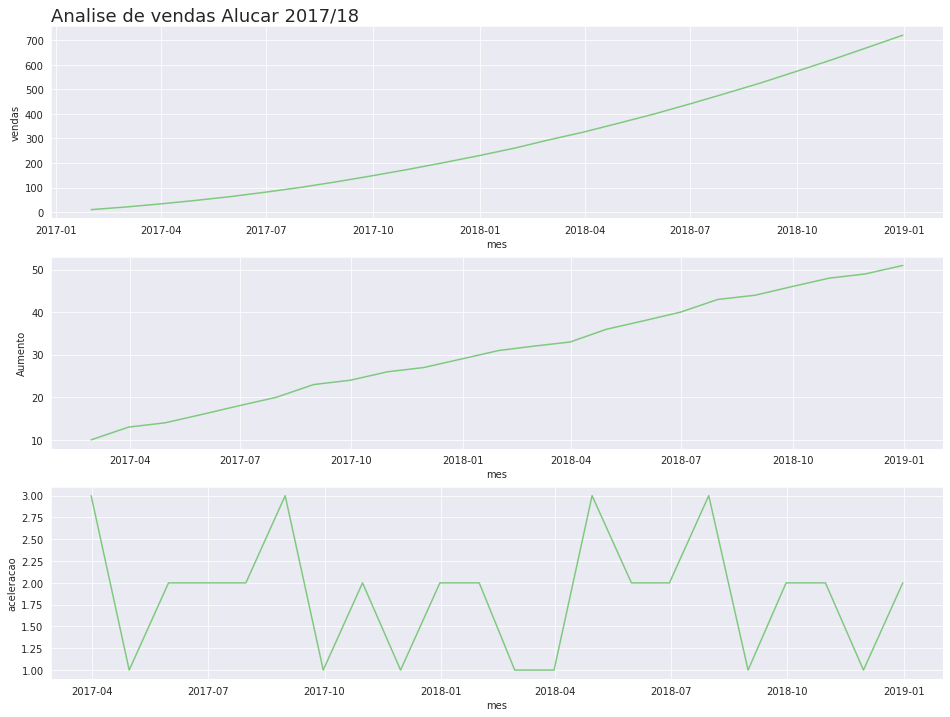

In [16]:
#Criando 3 versões de gráficos, para melhor análise

#Criando uma função comparativa dos 3 gráficos

def CriarGrafico3(x,y,y2,y3,dataset, titulo):
  #Gráfico 1
  plt.figure(figsize=(16,12))
  grafico3= plt.subplot(3,1,1)
  grafico3.set_title(titulo, fontsize=18, loc='left')
  sns.lineplot(x=x ,y=y , data=dataset)

  #Grafico2
  plt.subplot(3,1,2)
  sns.lineplot(x=x, y=y2, data=dataset)

  #Gráfico3
  plt.subplot(3,1,3)
  sns.lineplot(x=x, y=y3, data=dataset)

CriarGrafico3('mes', 'vendas', 'Aumento', 'aceleracao', alucar, 'Analise de vendas Alucar 2017/18')

##AutoCorrelação

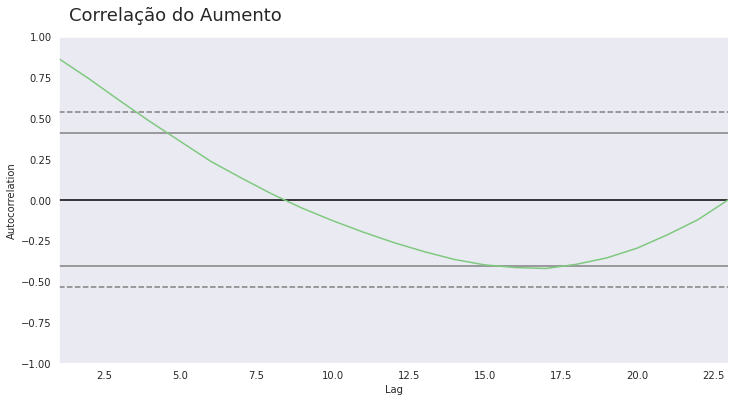

In [13]:
#importando a ferramenta
from pandas.plotting import autocorrelation_plot

gCorrelacao = plt.figure(figsize=(12,6))
gCorrelacao.suptitle('Correlação do Aumento', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['Aumento'][1:])
gCorrelacao = gCorrelacao